In [1]:
import fitz  # PyMuPDF para leer el PDF
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import itertools
from nltk.util import ngrams
from collections import Counter

In [19]:
# Descargar recursos de NLTK (solo la primera vez)
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
# 2. Leer el PDF (reemplaza por la ruta de tu archivo BobDylan.pdf)
ruta_pdf = "C:/Users/ACER/OneDrive/Documentos/Analitica de datos/1. Maestria/7. NLP/Clase_4/BobDylan.pdf"
doc = fitz.open(ruta_pdf)

In [21]:
texto = ""
for pagina in doc:
    texto += pagina.get_text()

# 3. Preprocesamiento b√°sico
# - Pasar a min√∫sculas
# - Eliminar caracteres especiales
texto = texto.lower()
texto = re.sub(r'[^a-z√°√©√≠√≥√∫√º√±\s]', '', texto)

In [24]:
# 4. Tokenizaci√≥n
tokens = nltk.word_tokenize(texto, language="spanish")

# 5. Eliminar stopwords (palabras vac√≠as)
stop_words = set(stopwords.words("spanish"))
tokens_filtrados = [t for t in tokens if t not in stop_words and len(t) > 2]

In [25]:
# ==========================
# AN√ÅLISIS DE N-GRAMAS
# ==========================

def generar_ngrama(tokens, n):
    return list(ngrams(tokens, n))

# 1-gramas (unigramas)
unigramas = generar_ngrama(tokens_filtrados, 1)
cont_unigramas = Counter(unigramas)

# 2-gramas (bigramas)
bigramas = generar_ngrama(tokens_filtrados, 2)
cont_bigramas = Counter(bigramas)

# 3-gramas (trigramas)
trigramas = generar_ngrama(tokens_filtrados, 3)
cont_trigramas = Counter(trigramas)


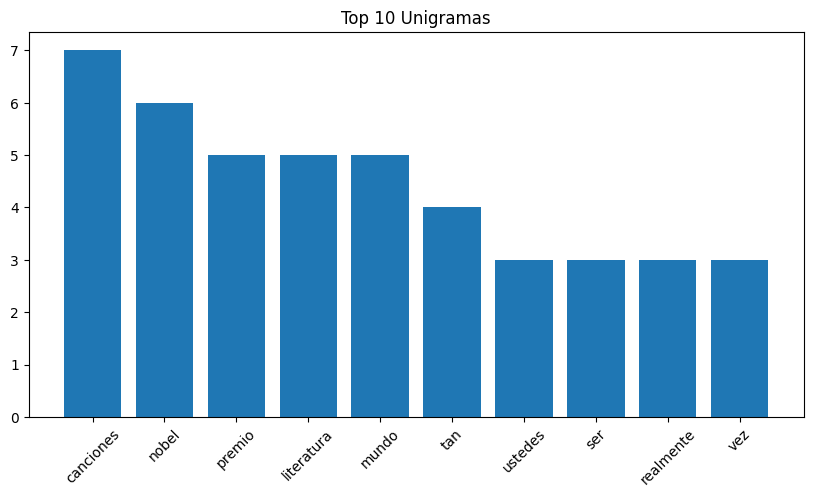

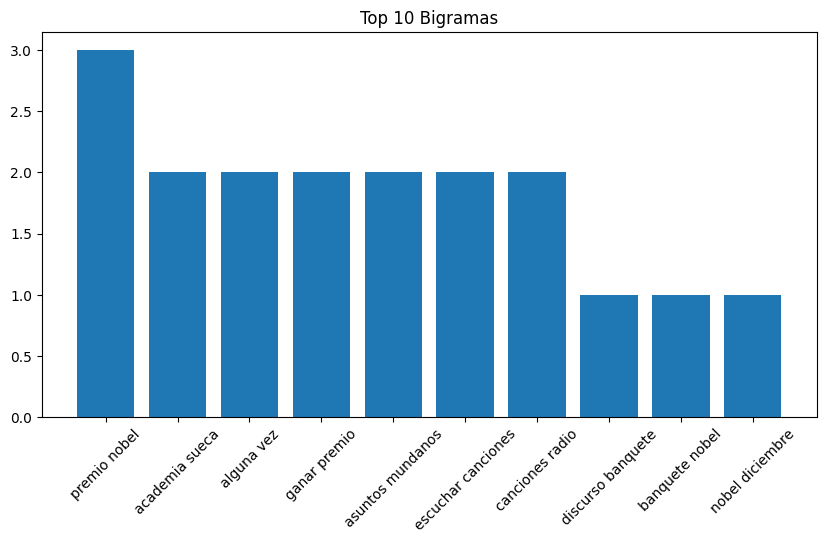

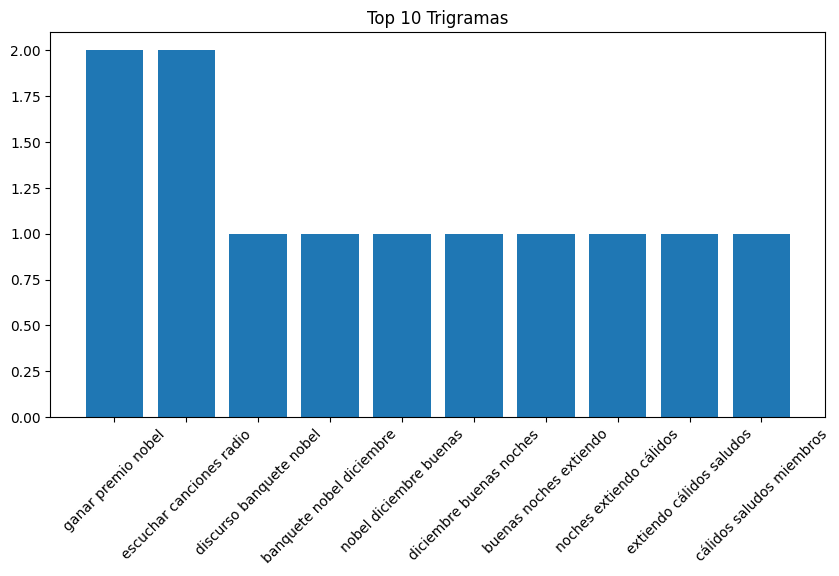

In [26]:
# ==========================
# VISUALIZACI√ìN
# ==========================

def graficar_frecuencias(counter, titulo, n=10):
    etiquetas, valores = zip(*counter.most_common(n))
    etiquetas = [' '.join(e) for e in etiquetas]  # unir n-gramas
    plt.figure(figsize=(10,5))
    plt.bar(etiquetas, valores)
    plt.xticks(rotation=45)
    plt.title(titulo)
    plt.show()

# Graficar los top 10 de cada n-grama
graficar_frecuencias(cont_unigramas, "Top 10 Unigramas")
graficar_frecuencias(cont_bigramas, "Top 10 Bigramas")
graficar_frecuencias(cont_trigramas, "Top 10 Trigramas")

In [33]:
# ================================
# --- Conteo de N-gramas en tabla ---
# ================================
import pandas as pd

def mostrar_top(counter, titulo, n=10):
    df = pd.DataFrame(counter.most_common(n), columns=["N-grama", "Frecuencia"])
    df["N-grama"] = df["N-grama"].apply(lambda x: " ".join(x))  # unir palabras
    print(f"\nüîπ {titulo}")
    print(df.to_string(index=False))
    return df

# Unigramas
df_uni = mostrar_top(cont_unigramas, "Top 10 Unigramas")

# Bigramas
df_bi = mostrar_top(cont_bigramas, "Top 10 Bigramas")

# Trigramas
df_tri = mostrar_top(cont_trigramas, "Top 10 Trigramas")



üîπ Top 10 Unigramas
N-grama  Frecuencia
     de          35
    que          33
     en          31
      y          18
     la          16
     el          16
      a          14
   para          12
    mis           9
    m√°s           9

üîπ Top 10 Bigramas
      N-grama  Frecuencia
        en la           6
        de la           4
        en el           4
 premio nobel           3
     el mundo           3
       de que           3
mis canciones           3
       lo que           3
     nobel de           2
      a todos           2

üîπ Top 10 Trigramas
             N-grama  Frecuencia
   la academia sueca           2
      con ustedes en           2
     el premio nobel           2
       todo el mundo           2
       de que estaba           2
     qui√©nes son los           2
para estas canciones           2
     canciones en la           2
         en la radio           2
     haciendo lo que           2


In [34]:
# ================================
# --- 5) Modelo simple de bigramas con suavizado Laplace ---
# ================================

import math

# 1. Construcci√≥n de bigramas y conteos
bigramas = generar_ngrama(tokens, 2)
cont_bigramas = Counter(bigramas)
cont_unigramas = Counter(tokens)

# 2. Funci√≥n de probabilidad con suavizado de Laplace
def prob_bigram_laplace(palabra1, palabra2, cont_bigramas, cont_unigramas, vocabulario):
    bigrama = (palabra1, palabra2)
    num = cont_bigramas[bigrama] + 1   # +1 suavizado Laplace
    den = cont_unigramas[palabra1] + len(vocabulario)  # tama√±o del vocabulario
    return num / den

# 3. Funci√≥n de autocompletado
def predecir_siguiente(palabra, cont_bigramas, cont_unigramas, vocabulario, top=5):
    candidatos = []
    for w in vocabulario:
        p = prob_bigram_laplace(palabra, w, cont_bigramas, cont_unigramas, vocabulario)
        candidatos.append((w, p))
    # ordenar por probabilidad descendente
    candidatos = sorted(candidatos, key=lambda x: x[1], reverse=True)
    return candidatos[:top]

# --- Ejemplo de uso ---
vocabulario = set(tokens)

entrada = "vectorizaci√≥n"
predicciones = predecir_siguiente(entrada, cont_bigramas, cont_unigramas, vocabulario, top=5)

print(f"\nüîπ Palabra de entrada: {entrada}")
print("Posibles continuaciones (con Laplace):")
for palabra, prob in predicciones:
    print(f"{entrada} {palabra} -> {prob:.4f}")



üîπ Palabra de entrada: vectorizaci√≥n
Posibles continuaciones (con Laplace):
vectorizaci√≥n tomarse -> 0.0025
vectorizaci√≥n montarse -> 0.0025
vectorizaci√≥n adecuadamente -> 0.0025
vectorizaci√≥n tan -> 0.0025
vectorizaci√≥n a√±os -> 0.0025


In [35]:
# ================================
# --- 6) Extracci√≥n de frases comunes (Collocations) ---
# ================================
import nltk
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder
from nltk.metrics import BigramAssocMeasures, TrigramAssocMeasures

# 1. Bigramas frecuentes
bigram_finder = BigramCollocationFinder.from_words(tokens)
bigram_finder.apply_freq_filter(3)  # solo bigramas que aparecen >= 3 veces
top_bigrams = bigram_finder.nbest(BigramAssocMeasures.likelihood_ratio, 10)

print("\nüîπ Top 10 Bigramas m√°s comunes (Collocations):")
for b in top_bigrams:
    print(" ".join(b))

# 2. Trigramas frecuentes
trigram_finder = TrigramCollocationFinder.from_words(tokens)
trigram_finder.apply_freq_filter(2)  # solo trigramas que aparecen >= 2 veces
top_trigrams = trigram_finder.nbest(TrigramAssocMeasures.likelihood_ratio, 10)

print("\nüîπ Top 10 Trigramas m√°s comunes (Collocations):")
for t in top_trigrams:
    print(" ".join(t))



üîπ Top 10 Bigramas m√°s comunes (Collocations):
premio nobel
en la
mis canciones
el mundo
en el
de la
lo que
de que

üîπ Top 10 Trigramas m√°s comunes (Collocations):
el premio nobel
la academia sueca
qui√©nes son los
en la radio
todo el mundo
son mis canciones
para estas canciones
haciendo lo que
canciones en la
con ustedes en


c:\Users\ACER\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


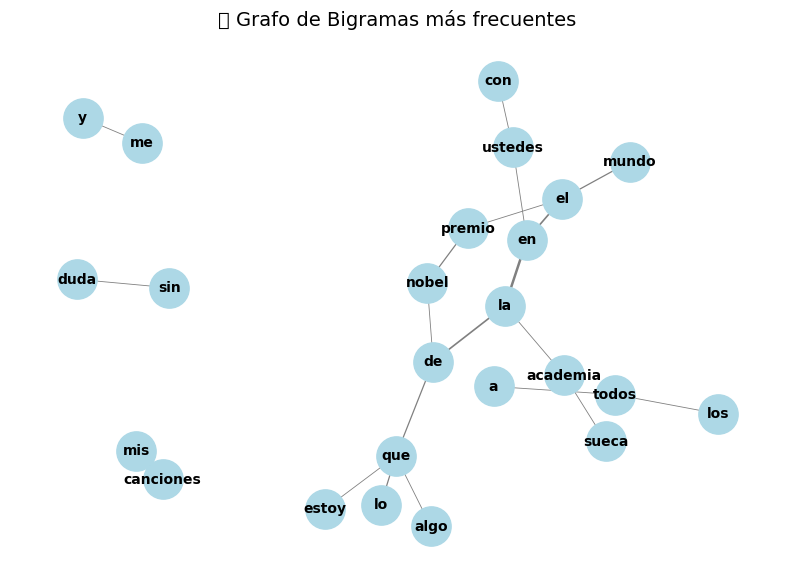

In [36]:
# ================================
# --- 10) Grafo de bigramas ---
# ================================
import networkx as nx
import matplotlib.pyplot as plt

# 1. Generar bigramas y contar frecuencias
bigramas = generar_ngrama(tokens, 2)
cont_bigramas = Counter(bigramas)

# 2. Seleccionar los bigramas m√°s frecuentes (ej: top 20)
top_bigramas = cont_bigramas.most_common(20)

# 3. Crear grafo
G = nx.Graph()

# A√±adir nodos y aristas con peso
for (w1, w2), freq in top_bigramas:
    G.add_edge(w1, w2, weight=freq)

# 4. Dibujar el grafo
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, k=0.5, seed=42)  # disposici√≥n del grafo
edges = G.edges(data=True)

# Grosor de las aristas proporcional a la frecuencia
nx.draw_networkx_nodes(G, pos, node_size=800, node_color="lightblue")
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[d['weight']*0.3 for (u,v,d) in edges], edge_color="gray")

plt.title("üîπ Grafo de Bigramas m√°s frecuentes", fontsize=14)
plt.axis("off")
plt.show()


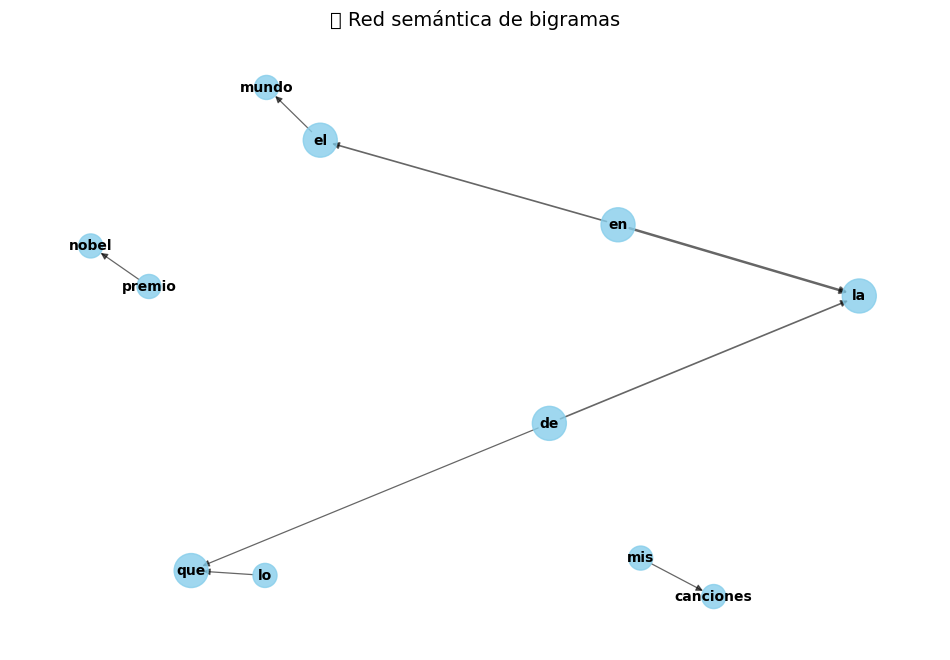

In [37]:
# ================================
# --- Red sem√°ntica de n-gramas ---
# ================================
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

# 1. Generar bigramas y contar frecuencias
bigramas = generar_ngrama(tokens, 2)
cont_bigramas = Counter(bigramas)

# 2. Filtro: quedarnos con bigramas que aparecen al menos 3 veces
bigramas_frecuentes = {bg: freq for bg, freq in cont_bigramas.items() if freq >= 3}

# 3. Crear grafo dirigido (opcional: puede ser no dirigido)
G = nx.DiGraph()

for (w1, w2), freq in bigramas_frecuentes.items():
    G.add_edge(w1, w2, weight=freq)

# 4. Visualizaci√≥n
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5, seed=42)

# Tama√±o de nodos seg√∫n grado
node_sizes = [G.degree(n)*300 for n in G.nodes()]

# Dibujar nodos y aristas
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="skyblue", alpha=0.8)
nx.draw_networkx_edges(G, pos, width=[d['weight']*0.3 for (u,v,d) in G.edges(data=True)], alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

plt.title("üîπ Red sem√°ntica de bigramas", fontsize=14)
plt.axis("off")
plt.show()


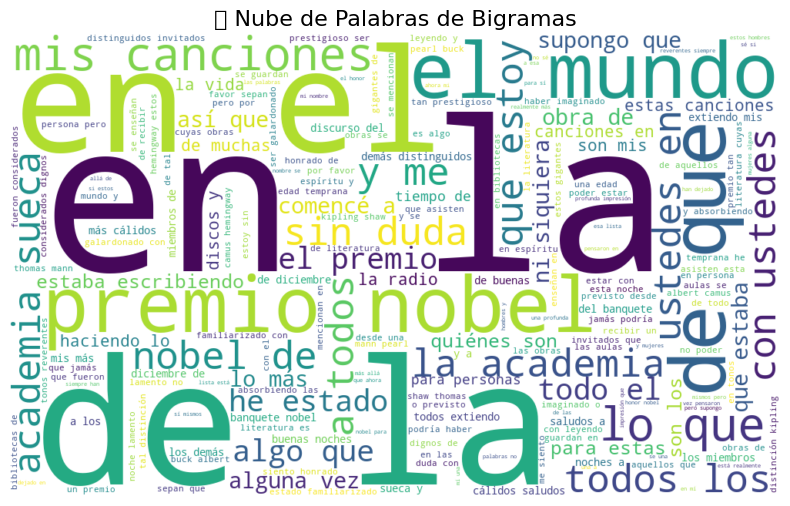

In [38]:
# ================================
# --- Nube de palabras de n-gramas ---
# ================================
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. Preparar frecuencias de bigramas (puedes cambiar a unigramas o trigramas)
bigramas = generar_ngrama(tokens, 2)
cont_bigramas = Counter(bigramas)

# Convertir a diccionario con formato "palabra1 palabra2" : frecuencia
bigram_dict = {" ".join(k): v for k, v in cont_bigramas.items()}

# 2. Crear nube de palabras
wordcloud = WordCloud(width=1000, height=600, background_color="white",
                      colormap="viridis").generate_from_frequencies(bigram_dict)

# 3. Mostrar
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("üîπ Nube de Palabras de Bigramas", fontsize=16)
plt.show()


In [39]:
# ================================
# --- C√°lculo de TF, DF, IDF y TF-IDF ---
# ================================
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# 1. Suponemos que 'texto' contiene TODO el PDF como un √∫nico documento
#    -> Si tienes varios documentos, col√≥calos en una lista: corpus = [doc1, doc2, doc3...]
corpus = [texto]

# --- TF (Term Frequency) y DF (Document Frequency) ---
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

# DataFrame con conteos absolutos (TF en cada documento)
tf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Document Frequency (DF): en cu√°ntos documentos aparece cada t√©rmino
df_series = (X > 0).sum(axis=0).A1
df = pd.DataFrame({"T√©rmino": vectorizer.get_feature_names_out(), "DF": df_series})

# --- IDF (Inverse Document Frequency) y TF-IDF ---
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(corpus)

# DataFrame con valores TF-IDF
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# ================================
# Mostrar resultados
# ================================
print("\nüîπ Term Frequency (TF) - Conteos absolutos (primeras 10 columnas):")
print(tf_df.iloc[:, :10])

print("\nüîπ Document Frequency (DF) - Top 10 t√©rminos:")
print(df.sort_values(by="DF", ascending=False).head(10))

print("\nüîπ TF-IDF - Primeras 10 columnas:")
print(tfidf_df.iloc[:, :10])



üîπ Term Frequency (TF) - Conteos absolutos (primeras 10 columnas):
   absorbiendo  academia  actores  adecuada  adecuadamente  adecuados  \
0            1         2        1         1              1          1   

   adolescente  agradecido  agradezco  ahora  
0            1           1          1      1  

üîπ Document Frequency (DF) - Top 10 t√©rminos:
           T√©rmino  DF
399         √∫ltima   1
0      absorbiendo   1
1         academia   1
2          actores   1
3         adecuada   1
4    adecuadamente   1
5        adecuados   1
6      adolescente   1
7       agradecido   1
8        agradezco   1

üîπ TF-IDF - Primeras 10 columnas:
   absorbiendo  academia   actores  adecuada  adecuadamente  adecuados  \
0     0.013228  0.026456  0.013228  0.013228       0.013228   0.013228   

   adolescente  agradecido  agradezco     ahora  
0     0.013228    0.013228   0.013228  0.013228  


In [40]:
# ================================
# Corpus como un √∫nico documento
# ================================

# 'texto' contiene todo el PDF le√≠do (ya lo cargamos antes con fitz)
corpus = [texto]   # lista con un √∫nico documento

print("N√∫mero de documentos en corpus:", len(corpus))
print("Vista previa del documento (primeros 500 caracteres):\n")
print(corpus[0][:500])


N√∫mero de documentos en corpus: 1
Vista previa del documento (primeros 500 caracteres):

discurso del banquete nobel  de diciembre de  
buenas noches a todos extiendo mis m√°s c√°lidos saludos a los miembros de la academia 
sueca y a todos los dem√°s distinguidos invitados que asisten esta noche 
lamento no poder estar con ustedes en persona pero por favor sepan que estoy sin duda con 
ustedes en esp√≠ritu y me siento honrado de recibir un premio tan prestigioso ser galardonado 
con el premio nobel de literatura es algo que jam√°s podr√≠a haber imaginado o previsto 
desde una edad tempran


In [41]:
# ================================
# --- Bag of Words (BoW) ---
# ================================
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Usamos el corpus como un √∫nico documento (texto completo del PDF)
corpus = [texto]

# 1. Crear el modelo BoW
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

# 2. Convertir a DataFrame
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# 3. Mostrar resultados
print("üîπ Bag of Words (BoW) - Primeras 20 palabras:\n")
print(bow_df.iloc[:, :20])  # primeras 20 columnas
print("\nDimensiones del BoW:", bow_df.shape)


üîπ Bag of Words (BoW) - Primeras 20 palabras:

   absorbiendo  academia  actores  adecuada  adecuadamente  adecuados  \
0            1         2        1         1              1          1   

   adolescente  agradecido  agradezco  ahora  albergar  albert  alcanzar  \
0            1           1          1      1         1       1         1   

   alejado  algo  alguien  alguna  algunas  all√°  all√≠  
0        1     2        1       2        1     1     1  

Dimensiones del BoW: (1, 400)


In [42]:
# ================================
# --- Guardar texto depurado en TXT ---
# ================================
# Suponemos que la variable 'texto' contiene el texto ya depurado
# (si trabajaste con 'tokens', puedes unirlos de nuevo en un string)

# 1. Si quieres guardar el texto depurado como un string continuo:
with open("texto_depurado.txt", "w", encoding="utf-8") as f:
    f.write(texto)

print("‚úÖ Texto depurado guardado en 'texto_depurado.txt'")

# 2. Si prefieres guardar los tokens (una palabra por l√≠nea):
with open("tokens_depurados.txt", "w", encoding="utf-8") as f:
    for token in tokens:
        f.write(token + "\n")

print("‚úÖ Tokens depurados guardados en 'tokens_depurados.txt'")


‚úÖ Texto depurado guardado en 'texto_depurado.txt'
‚úÖ Tokens depurados guardados en 'tokens_depurados.txt'


‚úÖ N√∫mero de p√°ginas con texto: 2


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
c:\Users\ACER\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


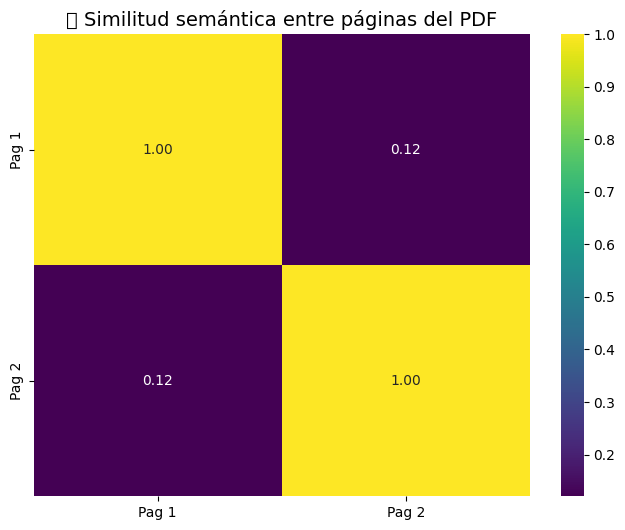

In [6]:
# ================================
# --- Heatmap de similitud sem√°ntica entre p√°ginas (versi√≥n corregida) ---
# ================================
import fitz
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.corpus import stopwords

# Descargar stopwords en espa√±ol (solo la primera vez)
nltk.download("stopwords")
stop_words_es = stopwords.words("spanish")

# 1. Leer PDF y extraer texto por p√°ginas
ruta_pdf = "C:/Users/ACER/OneDrive/Documentos/Analitica de datos/1. Maestria/7. NLP/Clase_4/BobDylan.pdf"
doc = fitz.open(ruta_pdf)

corpus_paginas = []
for pagina in doc:
    texto = pagina.get_text().strip()
    if texto:  # solo a√±adimos si no est√° vac√≠o
        corpus_paginas.append(texto)

print(f"‚úÖ N√∫mero de p√°ginas con texto: {len(corpus_paginas)}")

# 2. Vectorizaci√≥n con TF-IDF usando stopwords en espa√±ol
vectorizer = TfidfVectorizer(stop_words=stop_words_es, lowercase=True)
X = vectorizer.fit_transform(corpus_paginas)

# 3. Calcular matriz de similitud coseno
sim_matrix = cosine_similarity(X)

# 4. Graficar heatmap
plt.figure(figsize=(8,6))
sns.heatmap(sim_matrix, annot=True, fmt=".2f", cmap="viridis",
            xticklabels=[f"Pag {i+1}" for i in range(len(corpus_paginas))],
            yticklabels=[f"Pag {i+1}" for i in range(len(corpus_paginas))])

plt.title("üîπ Similitud sem√°ntica entre p√°ginas del PDF", fontsize=14)
plt.show()
